In [1]:
import torch
import math
from torch.distributions import Poisson
import matplotlib.pyplot as plt
import numpy as np
from poisson_process import PoissonProcess

In [2]:
intense_pts = torch.linspace(0, 10).unsqueeze(-1)

In [3]:
def intense_func(pts):
    return  torch.sin(intense_pts[:, 0])

In [4]:
intense_vals = intense_func(intense_pts)

In [5]:
proc = PoissonProcess(intense_pts, intense_vals)
proc.in_dim

tensor(0.1010)


1

In [6]:
sim = proc.simulate()

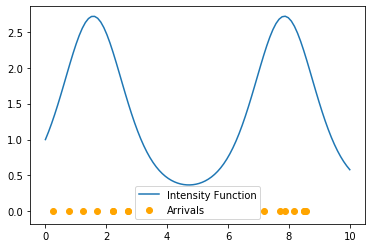

In [7]:
plt.plot(intense_pts, intense_vals.exp(), label="Intensity Function")
plt.scatter(sim, torch.zeros_like(sim), label="Arrivals", color="orange")
plt.legend()

## Now in 2D

In [8]:
n = 50
x_max = 2.
grid = torch.zeros(int(pow(n, 2)), 2)
for i in range(n):
    for j in range(n):
        grid[i * n + j][0] = float(i) / (n-1)
        grid[i * n + j][1] = float(j) / (n-1)
        
grid = grid * x_max

In [9]:
def intense_func(pts):
#     return (torch.sin(pts[:, 0]*0.5) + 0.2*torch.sin(pts[:, 1] * 5)).exp()
    return 1.5*torch.sin(pts[:, 1] * 5 + 1.) + torch.sin(pts[:, 0])

In [10]:
intense = intense_func(grid)

In [11]:
xx, yy = np.meshgrid(grid[:n, 1], grid[:n, 1])
int_plot = intense.reshape(xx.shape)

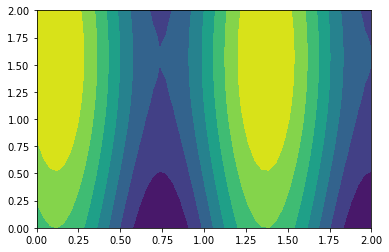

In [12]:
plt.contourf(xx, yy, int_plot)

In [13]:
pois_proc = PoissonProcess(grid, intense)

tensor(0.0408)


In [14]:
simmed_pts = pois_proc.simulate()

Text(0.5, 1.0, 'Simulated')

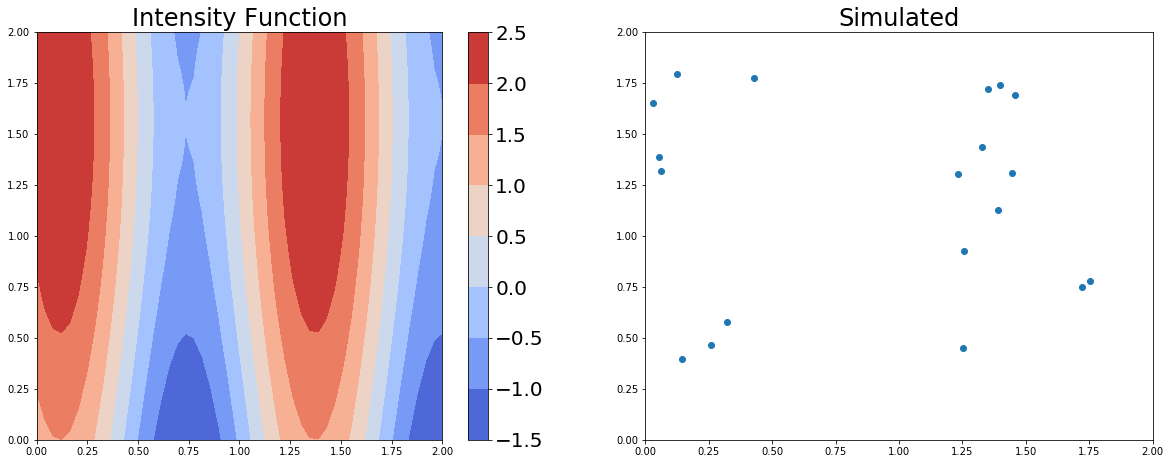

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7.5))
im=ax[0].contourf(xx, yy, int_plot, cmap='coolwarm')

cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Intensity Function",
               fontsize=24)

ax[1].scatter(simmed_pts[:, 1], simmed_pts[:, 0])
ax[1].set_xlim(0, x_max)
ax[1].set_ylim(0, x_max)

# ax[1].autoscale(False)
ax[1].set_title("Simulated",
               fontsize=24)



In [16]:
simmed_pts.shape

torch.Size([19, 2])

In [17]:
grd = pois_proc.compute_grad(simmed_pts)

In [18]:
grd

tensor([-0.0059, -0.0068, -0.0073,  ..., -0.0010, -0.0010, -0.0009])

In [21]:
hess = pois_proc.compute_hessian(simmed_pts)
hess.shape

torch.Size([2500, 2500])